6. Pandas Visuals

Generation study notes

Finnaly we come to the most important python session, working with Matplotlib. 

Everything we have learned in Python today has been preparing you to use Matplotlib.

In [101]:
# Let's begin by importing Matplotlib, Pandas and NumPy

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [102]:
# Next, let's prepare our data by importing the csv file and cleaning the data again.

data = pd.read_csv('StudentData.csv')
data.dropna(inplace = True)
data['Age'] = data['Age'].astype('int')
data['Score Jan'] = data['Score Jan'].astype('int')
data['Score Feb'] = data['Score Feb'].astype('int')
data['Score Mar'] = data['Score Mar'].astype('int')
data.drop_duplicates(subset='Name', inplace = True)

print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80 entries, 0 to 87
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Name       80 non-null     object
 1   Age        80 non-null     int32 
 2   Score Jan  80 non-null     int32 
 3   Score Feb  80 non-null     int32 
 4   Score Mar  80 non-null     int32 
 5   Country    80 non-null     object
 6   Jan Date   80 non-null     object
 7   Feb Date   80 non-null     object
 8   Mar Date   80 non-null     object
dtypes: int32(4), object(5)
memory usage: 5.0+ KB
None
               Name  Age  Score Jan  Score Feb  Score Mar         Country  \
0     Dylan Sanders   21         56         79         31  United Kingdom   
2    Gabriel Routin   52         38         48         28    South Africa   
3       Caleb Sheen   33         83         62         27       Australia   
4      Aundry Smith   46         70         56         84         Germany   
5  Phillip Johonson   55     

Great, our data is ready!

Let's now start creating some visuals to help describe our data. Luckily, we have already investigated our data to a small degree earlier today.
Meaning we already have a basic understanding of the data. 

Let's get that scatter plot again. We can use it in our report.

In [103]:
# Let's add the average score field to our dataframe for use in the scatterplot

data['Average Score'] = data[['Score Jan','Score Feb','Score Mar']].mean(axis=1)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80 entries, 0 to 87
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           80 non-null     object 
 1   Age            80 non-null     int32  
 2   Score Jan      80 non-null     int32  
 3   Score Feb      80 non-null     int32  
 4   Score Mar      80 non-null     int32  
 5   Country        80 non-null     object 
 6   Jan Date       80 non-null     object 
 7   Feb Date       80 non-null     object 
 8   Mar Date       80 non-null     object 
 9   Average Score  80 non-null     float64
dtypes: float64(1), int32(4), object(5)
memory usage: 5.6+ KB
None


If I remember correctly, we discovered that there are very few learners older than 40.
To have more accurate results, let's remove these.

In [104]:
# Remember, to filter out the unwanted data, we use the syntax below. 
# In this example, we are updating our dataframe directly.

data = data[data['Age'] < 40]

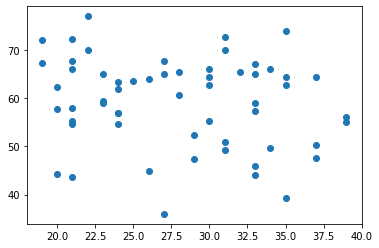

In [105]:
# Unlike working in a dataframe with visuals, using Matplotlib directly requires us to reference the data, not just the field names

# Let's create our fields
age = data['Age']
averageScore = data['Average Score']

# Now to create the plot iself with Matplotlib, the syntax is similar to previous exercises.
plt.scatter(x=age, y=averageScore)

This is how you create a basic plot using Matplotlib.

Let's practice creating a few other kinds of plots, before moving on to adding more details to each.

Let's create a line plot to discover if there is any significance in when a learner writes their exam and the exam score.

Our learners have the first full week in each of the three months to write their exams online. We would like to see if there is any significance in
a particular day in the week where learner scores seem to be higher or lower.

Note: The passing grade for learners is an average of 60 for all three months. 

In [106]:
# Let's start by sorting our data by the date. Our date field respresents the day of the week learner's write the exam.

# We will start by investigating january on it's own.
jan = data[['Score Jan','Jan Date']]

# Let's sort our data from low to high.
jan = jan.sort_values(by='Jan Date')

# Now let's group the data by each date and return the average.
# REMEMBER TO USE RESET INDEX METHOD!!!!!!
# By default pandas will remove the groupby target column in the result.
jan = jan.groupby(by=['Jan Date'], axis=0).mean().reset_index()

# Let' make sure we get the desired output
print(jan.head())

     Jan Date  Score Jan
0  2023/01/01  64.444444
1  2023/01/02  56.428571
2  2023/01/03  66.333333
3  2023/01/04  73.333333
4  2023/01/05  64.142857


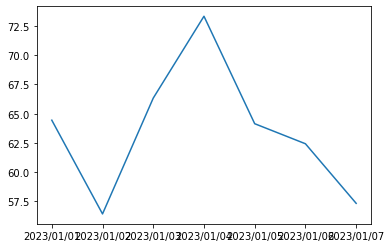

In [107]:
# Now let's plot the results on a line chart

# We will first assign our variables
date = jan['Jan Date']
score = jan['Score Jan']

# Then simply use the default plot method with our date and score
plt.plot(date, score)

There is definatly some significance to the date an exam was written. The dates are hard to read, but we will come back later to fix this.

Let's see if this trend continues with the other two months

In [108]:
# We can fetch the data for feb and mar
feb = data[['Score Feb','Feb Date']]
mar = data[['Score Mar','Mar Date']]


# Let's sort our data from low to high.
feb = feb.sort_values(by='Feb Date')
mar = mar.sort_values(by='Mar Date')

# Now let's group the data by each date and return the average.
feb = feb.groupby(by=['Feb Date'], axis=0).mean().reset_index()
mar = mar.groupby(by=['Mar Date'], axis=0).mean().reset_index()

# Let' make sure we get the desired output
print(feb.head())
print(feb.info())

print(mar.head())
print(mar.info())

     Feb Date  Score Feb
0  2023/02/05  53.142857
1  2023/02/06  49.500000
2  2023/02/07  62.800000
3  2023/02/08  57.142857
4  2023/02/09  64.357143
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Feb Date   7 non-null      object 
 1   Score Feb  7 non-null      float64
dtypes: float64(1), object(1)
memory usage: 240.0+ bytes
None
     Mar Date  Score Mar
0  2023/03/05  71.142857
1  2023/03/06  47.222222
2  2023/03/07  58.666667
3  2023/03/08  52.833333
4  2023/03/09  58.375000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Mar Date   7 non-null      object 
 1   Score Mar  7 non-null      float64
dtypes: float64(1), object(1)
memory usage: 240.0+ bytes
None


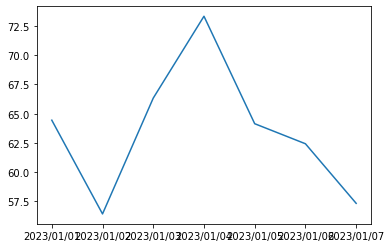

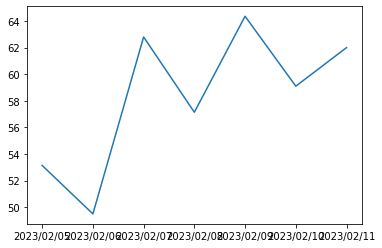

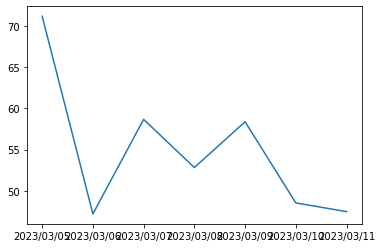

In [109]:
# Now let's plot the results on a line chart

# We will first assign our variables
feb_date = feb['Feb Date']
feb_score = feb['Score Feb']

mar_date = mar['Mar Date']
mar_score = mar['Score Mar']

# Then simply use the default plot method with our date and score
# We don't need to redefine the variables for jan, we can pull them from earlier
plt.plot(date, score)

plt.show()

plt.plot(feb_date, feb_score)

# We will break up the two charts using the plt.show method, otherwise they will combine. And display as one mutated chart!
plt.show()

plt.plot(mar_date, mar_score)

The only consistant thing between these three visuals is the sharp decline when writing on a Monday.

At this point i would group all three weeks together by the day of the week to get the overall average. This would be
more accurate and more insightful. We don't have enough data to draw a strong conclusion.


But this would also be outside the scope of today's course. Our goal was to create basic visuals and we have done just so.

You can see now just how integral data manipulation is when working with visuals. 90% of working with visuals is preparing the data.

Next, let's create a histogram. 

Creating Hisgorams can be very useful in quickly understanding the shape of our data. 

In [110]:
# Now that we have an average score field, let's use it to view where the learner scores are focused
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58 entries, 0 to 87
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           58 non-null     object 
 1   Age            58 non-null     int32  
 2   Score Jan      58 non-null     int32  
 3   Score Feb      58 non-null     int32  
 4   Score Mar      58 non-null     int32  
 5   Country        58 non-null     object 
 6   Jan Date       58 non-null     object 
 7   Feb Date       58 non-null     object 
 8   Mar Date       58 non-null     object 
 9   Average Score  58 non-null     float64
dtypes: float64(1), int32(4), object(5)
memory usage: 4.1+ KB
None


(array([ 2.,  2.,  5.,  5.,  6.,  8., 11., 12.,  5.,  2.]),
 array([36. , 40.1, 44.2, 48.3, 52.4, 56.5, 60.6, 64.7, 68.8, 72.9, 77. ]),
 <BarContainer object of 10 artists>)

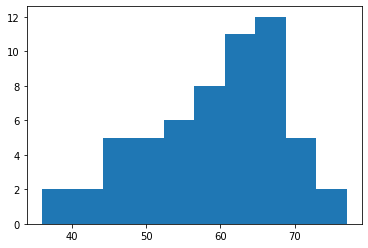

In [111]:

plt.hist(data['Average Score'])

Here we can see our student scores were focused around the 60 - 70 mark. This is very good. Overall they did well. 

You can see, not every chart requires you to manipulate the data heavily. Because the histogram only requires a single field, it's simple
to work with.

Next, we can work with a similar chart. The Box plot.

The Box plot shows you the shape of the data in a similar way to a histogram. Let's see how the same data looks in this new visual

{'whiskers': [<matplotlib.lines.Line2D at 0x1aa789e01c0>,
 'caps': [<matplotlib.lines.Line2D at 0x1aa789e0760>,
 'boxes': [<matplotlib.lines.Line2D at 0x1aa789b7f10>],
 'medians': [<matplotlib.lines.Line2D at 0x1aa789e0d00>],
 'fliers': [<matplotlib.lines.Line2D at 0x1aa789e0fd0>],
 'means': []}

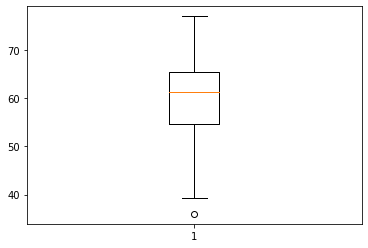

In [112]:
# Creating a boxplot is simple. 
plt.boxplot(data['Average Score'])

Notice how the perspective is slightly different but still very similar using a botplot.
Our average is what we expected, at 61. But the data is shown here to be split between 50-60's.

The different visuals help us see the data from different perspectives. Neither are wrong. Though our histogram is slightly less accurate because of the number of bins. We will fix this a little later with visual customisation. 

Lastly, let's create a simple column chart.

<BarContainer object of 3 artists>

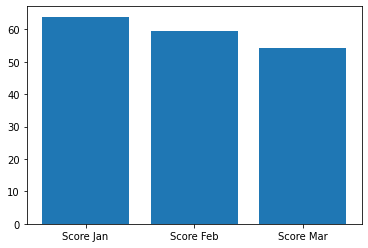

In [113]:
# For a column chart, we first need to create our labels
labels = ['Score Jan','Score Feb','Score Mar']

# Each bar has to contain a single value, so we average up each of the three fields...
jan_score = data['Score Jan'].mean()
feb_score = data['Score Feb'].mean()
mar_score = data['Score Mar'].mean()

# Then add them to a new list
score = [jan_score, feb_score, mar_score]

# Finnaly we plot the data as a column chart
plt.bar(labels, score)

<BarContainer object of 3 artists>

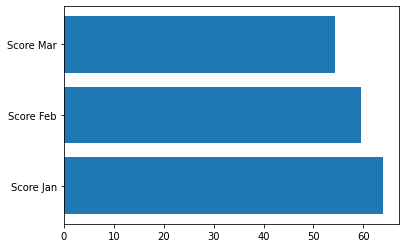

In [114]:
# We could just as easily use a bar chart instead
plt.barh(labels, score)

If we use a bar chart instead of a column chart, it becomes much easier to read the bar labels. 
Depending on how you plan to use the visual, especially when part of a larger dasboard or report. You may want to switch between bar or column charts

In [115]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58 entries, 0 to 87
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           58 non-null     object 
 1   Age            58 non-null     int32  
 2   Score Jan      58 non-null     int32  
 3   Score Feb      58 non-null     int32  
 4   Score Mar      58 non-null     int32  
 5   Country        58 non-null     object 
 6   Jan Date       58 non-null     object 
 7   Feb Date       58 non-null     object 
 8   Mar Date       58 non-null     object 
 9   Average Score  58 non-null     float64
dtypes: float64(1), int32(4), object(5)
memory usage: 4.1+ KB
None


Next, let's add some customisation to our charts.

You've likely noticed our charts looked a little bare. We can add various parameters to add depth and detail to each.
We will start with a line chart.

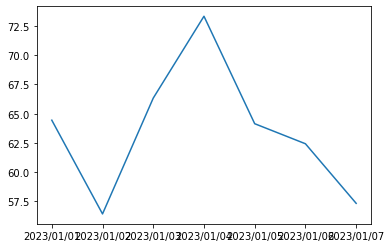

In [116]:
# We can use the line chart we created previously as our template.

date = jan['Jan Date']
score = jan['Score Jan']
plt.plot(date, score)

If you want to add customisation to a plot. You can use various Matplotlib functions after the chart has been created to fruther define it.

Text(0.5, 1.0, 'Avg Learner Scores in Jan')

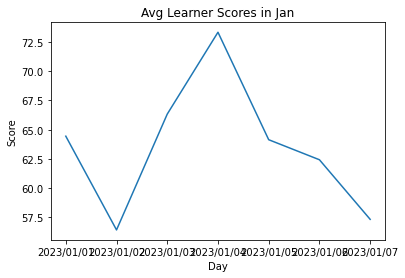

In [117]:
# Same code as prevous
date = jan['Jan Date']
score = jan['Score Jan']
plt.plot(date, score)

# Now we can add some labels
plt.xlabel('Day')
plt.ylabel('Score')

# And a title
plt.title('Avg Learner Scores in Jan')

Text(0.5, 1.0, 'Avg Learner Scores in Jan')

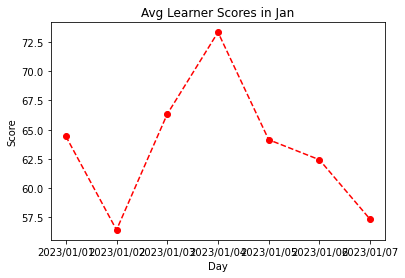

In [118]:
date = jan['Jan Date']
score = jan['Score Jan']

# Now we add some custom markers, lines and colors
plt.plot(date, score, marker='o', linestyle='--', color='red')


plt.xlabel('Day')
plt.ylabel('Score')
plt.title('Avg Learner Scores in Jan')

You've probably noticed the squished dates in the above examples of line charts. Let's fix that.

Text(0.5, 1.0, 'Avg Learner Scores in Jan (2022)')

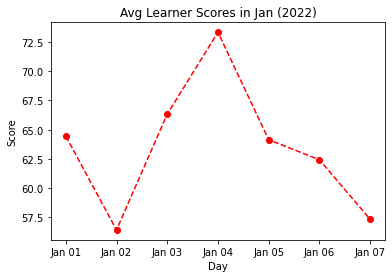

In [119]:
# We will need to import a new collection from the Matplotlib package for this to work
import matplotlib.dates as mdates

# The DateFormatter class formats the dates in a human-readable format (e.g., Jan 01). 
# You can customize the formatting by changing the string passed to the DateFormatter class.
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

date = jan['Jan Date']
score = jan['Score Jan']
plt.plot(date, score, marker='o', linestyle='--', color='red')
plt.xlabel('Day')
plt.ylabel('Score')

# Just for clarity, we will also mention the year in the title, because our new date format does not include year anymore
plt.title('Avg Learner Scores in Jan (2022)')

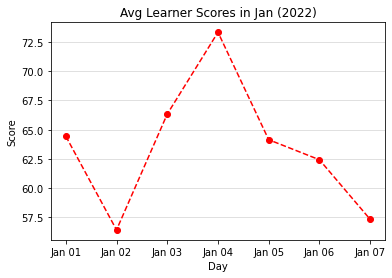

In [120]:
import matplotlib.dates as mdates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
date = jan['Jan Date']
score = jan['Score Jan']
plt.plot(date, score, marker='o', linestyle='--', color='red')
plt.xlabel('Day')
plt.ylabel('Score')
plt.title('Avg Learner Scores in Jan (2022)')

# Here we can add custom gridlines
plt.grid(axis='y', color='grey', alpha=0.3)

Fantastic!

Our line charts now look fantastic

Let's continue to spice up our previously created scatterplot!

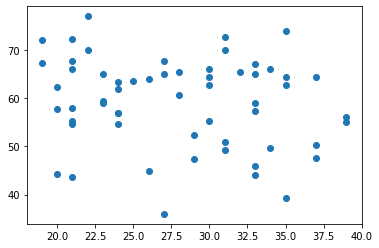

In [121]:
# This is what our scatterplot currently looks like...

age = data['Age']
averageScore = data['Average Score']
plt.scatter(x=age, y=averageScore)

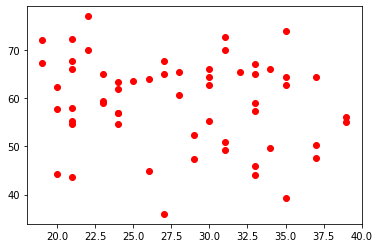

In [122]:
# We can start by adding a specific color for point

age = data['Age']
averageScore = data['Average Score']
plt.scatter(x=age, y=averageScore, color='red')

['United Kingdom' 'Australia' 'South Africa' 'Germany' 'America'
 'South America']


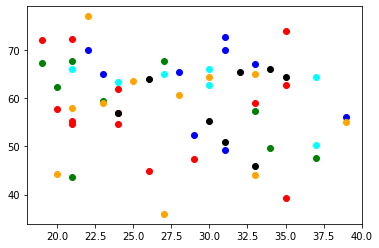

In [123]:
# We can also display unique colors for each country

# Let's print a list of each unique country, this will help us write our code
print(data['Country'].unique())

# We can quickly get a filtered version of our dataframe for each country
UK = data[data['Country'] == 'United Kingdom']
AUS = data[data['Country'] == 'Australia']
SA = data[data['Country'] == 'South Africa']
GER = data[data['Country'] == 'Germany']
AM = data[data['Country'] == 'America']
SAM = data[data['Country'] == 'South America']

# Then we create a scatterplot for each country
plt.scatter(x=UK['Age'], y=UK['Average Score'], color='red')
plt.scatter(x=AUS['Age'], y=AUS['Average Score'], color='green')
plt.scatter(x=SA['Age'], y=SA['Average Score'], color='blue')
plt.scatter(x=GER['Age'], y=GER['Average Score'], color='black')
plt.scatter(x=AM['Age'], y=AM['Average Score'], color='orange')
plt.scatter(x=SAM['Age'], y=SAM['Average Score'], color='cyan')

# When we manually trigger showing the plot, it will combine all our scatterplots into one
plt.show()

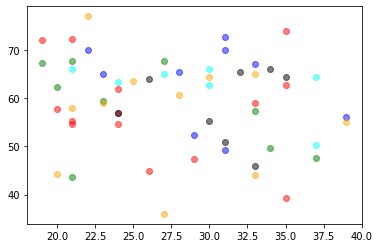

In [124]:
# Lastly we can set the alpha levels of the points. 
# This is less visable now but with thousands of records it becomes far more useful to see where the data is focused.

UK = data[data['Country'] == 'United Kingdom']
AUS = data[data['Country'] == 'Australia']
SA = data[data['Country'] == 'South Africa']
GER = data[data['Country'] == 'Germany']
AM = data[data['Country'] == 'America']
SAM = data[data['Country'] == 'South America']

plt.scatter(x=UK['Age'], y=UK['Average Score'], color='red', alpha=0.5)
plt.scatter(x=AUS['Age'], y=AUS['Average Score'], color='green', alpha=0.5)
plt.scatter(x=SA['Age'], y=SA['Average Score'], color='blue', alpha=0.5)
plt.scatter(x=GER['Age'], y=GER['Average Score'], color='black', alpha=0.5)
plt.scatter(x=AM['Age'], y=AM['Average Score'], color='orange', alpha=0.5)
plt.scatter(x=SAM['Age'], y=SAM['Average Score'], color='cyan', alpha=0.5)

plt.show()

Let's head back and customise our column chart in a similar way to how we have customised the rest.

<BarContainer object of 3 artists>

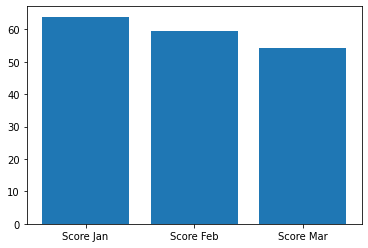

In [125]:
# Here is our chart we created previously

labels = ['Score Jan','Score Feb','Score Mar']
jan_score = data['Score Jan'].mean()
feb_score = data['Score Feb'].mean()
mar_score = data['Score Mar'].mean()
score = [jan_score, feb_score, mar_score]


plt.bar(labels, score)

<BarContainer object of 3 artists>

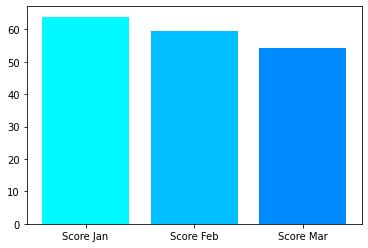

In [126]:
# Let's add some custom colors

labels = ['Score Jan','Score Feb','Score Mar']
jan_score = data['Score Jan'].mean()
feb_score = data['Score Feb'].mean()
mar_score = data['Score Mar'].mean()
score = [jan_score, feb_score, mar_score]

# We can define our colors as a list
columnColors = ['#00faff','#00beff','#008cff']

# Then add them to the color parameter
plt.bar(labels, score, color=columnColors)

<BarContainer object of 3 artists>

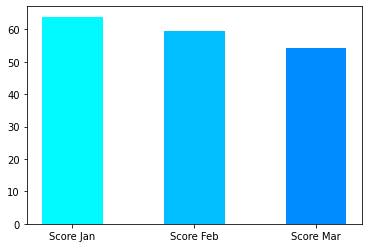

In [127]:
# Lastly we can set the column width to be less ... chonky

labels = ['Score Jan','Score Feb','Score Mar']
jan_score = data['Score Jan'].mean()
feb_score = data['Score Feb'].mean()
mar_score = data['Score Mar'].mean()
score = [jan_score, feb_score, mar_score]
columnColors = ['#00faff','#00beff','#008cff']

# We can use the width parameter to acheive this effect
plt.bar(labels, score, color=columnColors, width=0.5)

For our last exercise, we are going to set custom bin sizes for our Histogram

(array([ 2.,  2.,  5.,  5.,  6.,  8., 11., 12.,  5.,  2.]),
 array([36. , 40.1, 44.2, 48.3, 52.4, 56.5, 60.6, 64.7, 68.8, 72.9, 77. ]),
 <BarContainer object of 10 artists>)

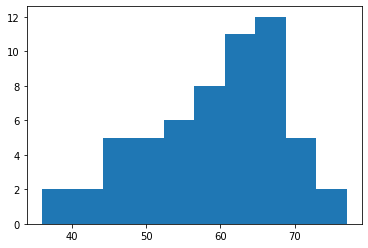

In [128]:
# if you remember, working with a histogram is very easy. Simply one line of code to get a basic visual

plt.hist(data['Average Score'])

(array([ 2.,  0.,  5.,  3.,  4.,  6.,  8.,  5., 14.,  6.,  3.,  2.]),
 array([36.        , 39.41666667, 42.83333333, 46.25      , 49.66666667,
        53.08333333, 56.5       , 59.91666667, 63.33333333, 66.75      ,
        70.16666667, 73.58333333, 77.        ]),
 <BarContainer object of 12 artists>)

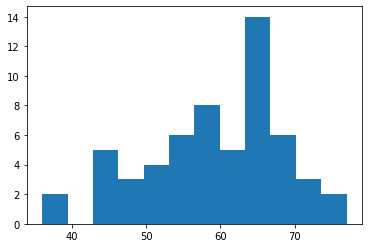

In [129]:
# We discussed that our histogram was a little inaccurate because of the bin sizes. Let's reduce the size for allow for more detail

# By setting the bin parameter to 12 (from the default of 10) we can see there was a lot of detail we missed
plt.hist(data['Average Score'], bins=12)